# Stacked Autoencoder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#features used
index = ['u (m/s)', 'T (K)', 'H2', 'H', 'O', 'O2', 'OH',
       'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO',
       'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3',
       'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2',
       'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN',
       'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO',
       'CH3CHO']
# target
target_name = ['Tin']

In [3]:
Y_pf = pd.read_csv("Y_pf.csv", sep=',', names = index) #shape: (26000, 55)

In [4]:
X_pf = pd.read_csv("X.csv", sep=',', names = ['unknown_1', 'unknown_2', 'Tin']) #shape: (25999, 3) 
X_pf.head()

unknown_1  unknown_2  Tin
0   0.011614   0.085258  500
1   0.017166   0.085258  900
2   0.018035   0.033771  500
3   0.013240   0.028302  300
4   0.014744   0.060219  900

In [5]:
#target = labels['Tin']
#targets_name = list(set(labels_name) - set(index)) # target to label and classify features
#target = target.iloc[0:26000]
#df_array = df.values

In [6]:
# Features
#df = new_labels  #shape: (32273, 55)
df = Y_pf         #shape: (26000, 55)

# target
#target = labels['Tin']  #shape:
target = X_pf['Tin']     #shape:

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sd_scaler = StandardScaler()
X_sd_scaled_with_centring = sd_scaler.fit_transform(df)

In [9]:
class RangeScaler():
    def __init__(self):
        return None

    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        Z = X/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z
    
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        X_mean = X.mean(axis=0)
        X_center = X-X_mean
        Z = X_center/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z
    
    
class ParetoScaler():
    
    def __init__(self):
        return None
    
    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        m = np.median(sd[sd > 0])        
        sd[sd == 0] = m
        Z = X/np.sqrt(sd)
        return Z
            
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        m = np.median(sd[sd > 0])        
        sd[sd == 0] = m
        X_mean = X.mean(axis=0)
        X_center = X-X_mean
        Z = X_center/np.sqrt(sd)
        return Z
    

class VastScaler():
    def __init__(self):
        return None
        
    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        m = np.median(sd[sd > 0])        
        sd[sd == 0] = m
        Z = (X/sd)*(X_mean/sd)
        return Z
    
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        m = np.median(sd[sd > 0])        
        sd[sd == 0] = m
        X_mean = X.mean(axis=0)
        X_center = X-X_mean
        Z = (X_center/sd)*(X_mean/sd)
        return Z

In [10]:
range_scaler = RangeScaler()
X_range_scaled = range_scaler.fit_transform(df)

vast_scaler = VastScaler()
X_vast_scaled = vast_scaler.fit_transform(df)

pareto_scaler = ParetoScaler()
X_pareto_scaled = pareto_scaler.fit_transform(df)

In [11]:
scaled_data = df
scaled_data = X_sd_scaled_with_centring
#scaled_data = X_range_scaled
scaled_data = X_vast_scaled

In [12]:
import tensorflow as tf

C:\Users\azarguit\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
#mnist = scaled_data

In [14]:
tf.reset_default_graph() 

## Parameters

In [15]:
num_inputs = 55 
neurons_hid1 = 20
neurons_hid2 = 4
neurons_hid3 = neurons_hid1 # Decoder Begins
num_outputs = num_inputs

learning_rate = 0.01

** Activation function **

In [16]:
actf = tf.nn.selu

### Placeholder

In [17]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Weights

Initializer capable of adapting its scale to the shape of weights tensors.

With `distribution="normal"`, samples are drawn from a truncated normal
distribution centered on zero, with `stddev = sqrt(scale / n)`
where n is:
  - number of input units in the weight tensor, if mode = "fan_in"
  - number of output units, if mode = "fan_out"
  - average of the numbers of input and output units, if mode = "fan_avg"

With `distribution="uniform"`, samples are drawn from a uniform distribution
within [-limit, limit], with `limit = sqrt(3 * scale / n)`.


In [18]:
initializer = tf.variance_scaling_initializer()

In [19]:
w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]), dtype=tf.float32)

### Biases

In [20]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

### Activation Function and Layers

In [21]:
act_func = tf.nn.selu

In [22]:
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = tf.matmul(hid_layer3, w4) + b4

### Loss Function

In [23]:
loss = tf.reduce_mean(tf.square(output_layer - X))

### Optimizer

In [24]:
#tf.train.RMSPropOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate)

In [25]:
train = optimizer.minimize(loss)

### Intialize Variables

In [26]:
init = tf.global_variables_initializer()

In [27]:
saver = tf.train.Saver() 

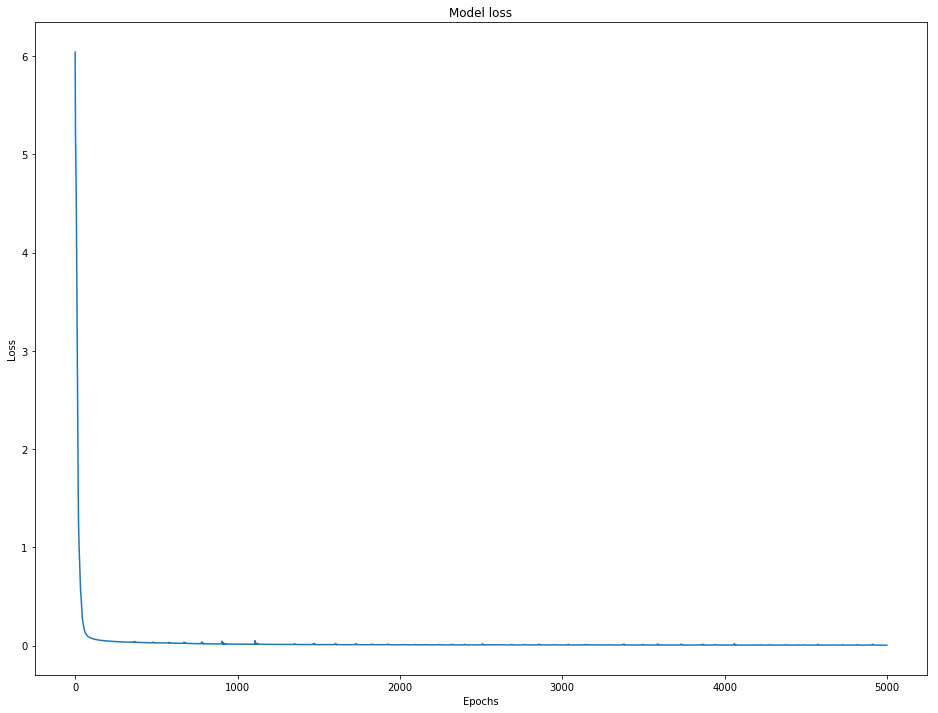

In [28]:
num_epochs = 5000
batch_size = 150
training_loss_array = []

with tf.Session() as sess:
    sess.run(init)
    
    # Epoch == Entire Training Set
    for epoch in range(num_epochs):
        
        #num_batches = mnist.train.num_examples // batch_size
        
        # 150 batch size
        #for iteration in range(num_batches):
            
        # X_batch, y_batch = mnist.train.next_batch(batch_size)
        #sess.run(train,feed_dict={X: scaled_data})
        sess.run(train, feed_dict={X: scaled_data})
            
        training_loss = loss.eval(feed_dict={X: scaled_data}) 
        training_loss_array.append(training_loss)
        
        
        
        #print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
    
    plt.figure(figsize=(16,12))
    plt.plot(list(range(epoch+1)), training_loss_array)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model loss')
     
    saver.save(sess, "./stacked_autoencoder.ckpt")      

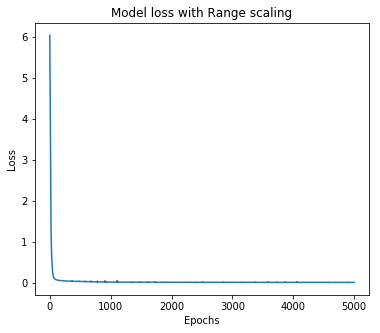

In [29]:
    plt.figure(figsize=(6,5))
    plt.plot(list(range(epoch+1)), training_loss_array)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model loss with Range scaling')
    plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\graphs\jupyter_graphs\PCA_with_Different_Scaling_Methods\error_simple.png')
    plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\graphs\jupyter_graphs\PCA_with_Different_Scaling_Methods\error_simple.pdf')
     

## Test Autoencoder output on Test Data

In [30]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,"./stacked_autoencoder.ckpt")
    
    results = hid_layer2.eval(feed_dict={X:scaled_data})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


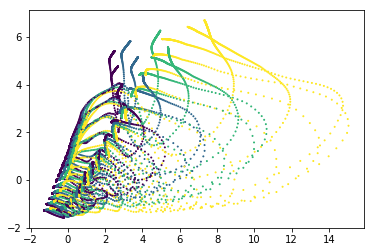

In [31]:
plt.scatter(results[:,0], results[:,1],c=target, s=1)

In [32]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special
#import plotly.io as pio

py.offline.init_notebook_mode(connected=True)

In [35]:
trace = go.Scatter3d(
    x= results[:,0],
    y= results[:,1], 
    z= results[:,2],


    mode='markers',
    marker=dict(
        size=1,
        color=target,
        colorbar=dict(
        title='Tin'
            ),
        colorscale='Viridis'
        
        ))


data = [trace]


layout = go.Layout(

    title='<b>PC1 vs PC2 vs PC3: Vast scaling</b>',
    scene = dict(
    xaxis = dict(
        title='PC1'),
    yaxis = dict(
        title='PC2'),
    zaxis = dict(
        title='PC3'),
    
    ),
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
#pio.write_image(fig, 'ffffffff.pdf')




In [34]:
class RangeScaler():
    def __init__(self):
        return None

    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        Z = X/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z
    
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        X_mean = X.mean(axis=0)
        X_center = X-X_mean
        Z = X_center/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z